# Load Cleaned Data

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import numpy as np
import seaborn as sns

In [38]:
census_tract_daily = pd.read_csv("data/census_tract_daily_data.csv")
census_tract_hourly = pd.read_csv("data/census_tract_hourly_data.csv")
hexagon7_daily = pd.read_csv("data/hexagon7_daily_data.csv")
hexagon7_hourly = pd.read_csv("data/hexagon7_hourly_data.csv")

census_tract_daily['Date'] = pd.to_datetime(census_tract_daily['Date'])
census_tract_hourly['Hour'] = pd.to_datetime(census_tract_hourly['Hour'])
hexagon7_daily['Date'] = pd.to_datetime(hexagon7_daily['Date'])
hexagon7_hourly['Hour'] = pd.to_datetime(hexagon7_hourly['Hour'])

In [39]:
census_tract_daily["Trip Seconds"].describe()

count    4.792400e+04
mean     1.453488e+05
std      6.069111e+05
min      0.000000e+00
25%      5.949000e+03
50%      2.463950e+04
75%      7.928625e+04
max      1.430792e+07
Name: Trip Seconds, dtype: float64

# Taxi Demand

In [40]:
# Extracting the components
census_tract_hourly['Date'] = census_tract_hourly['Hour'].dt.date
census_tract_hourly['Hour_Of_Day'] = census_tract_hourly['Hour'].dt.hour
census_tract_hourly['Weekday'] = census_tract_hourly['Hour'].dt.weekday  # Monday=0, Sunday=6
census_tract_hourly['Month'] = census_tract_hourly['Hour'].dt.month

## Taxi Demand by Day

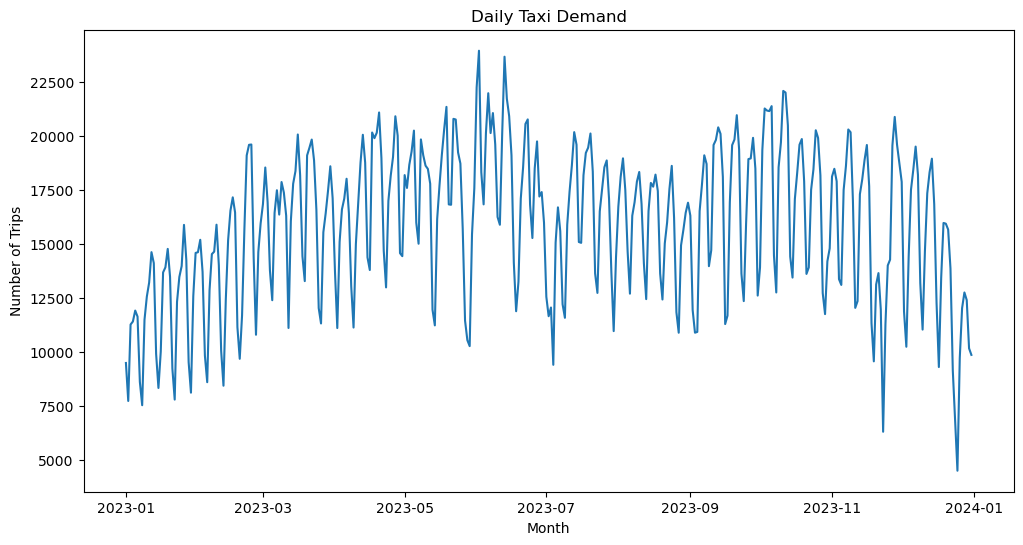

In [41]:
# Group by 'Date' and sum the 'Number of Trips'
daily_traffic = census_tract_hourly.groupby('Date')['Number of Trips'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Number of Trips', data=daily_traffic)

# Adding titles and labels
plt.title('Daily Taxi Demand')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.savefig('daily taxi demand.png', bbox_inches='tight')
# Display the plot
plt.show()

## Taxi Demand by Hour

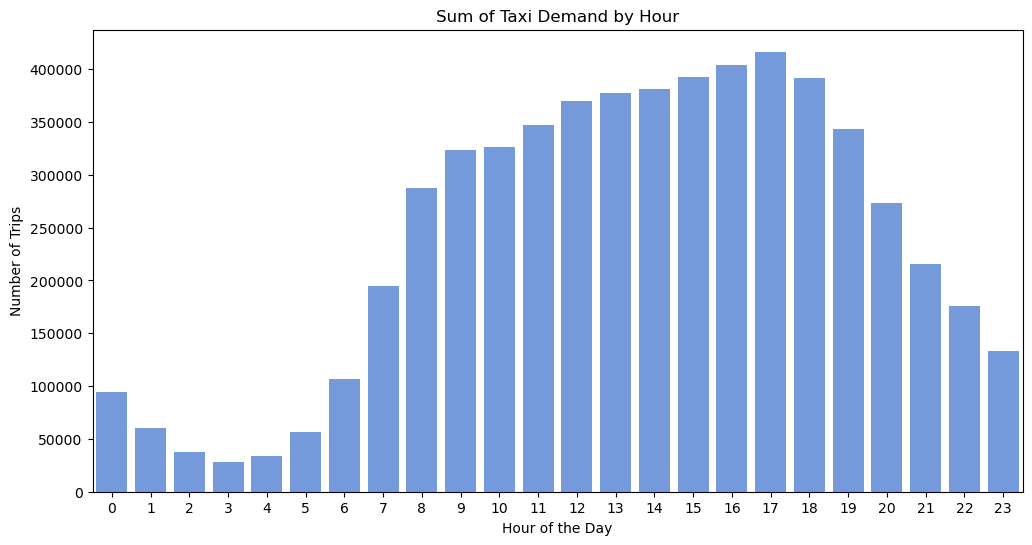

In [42]:
# Group by 'Hour_of_Day' and sum the 'Number of Trips'
hourly_traffic = census_tract_hourly.groupby('Hour_Of_Day')['Number of Trips'].sum().reset_index()

# Plot the hourly traffic volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour_Of_Day', y='Number of Trips', data=hourly_traffic, color="cornflowerblue")
# Add title and labels
plt.title('Sum of Taxi Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.savefig('demand by hour.png', bbox_inches='tight')
# Show the plot
plt.show()

## Taxi Demand by Weekday

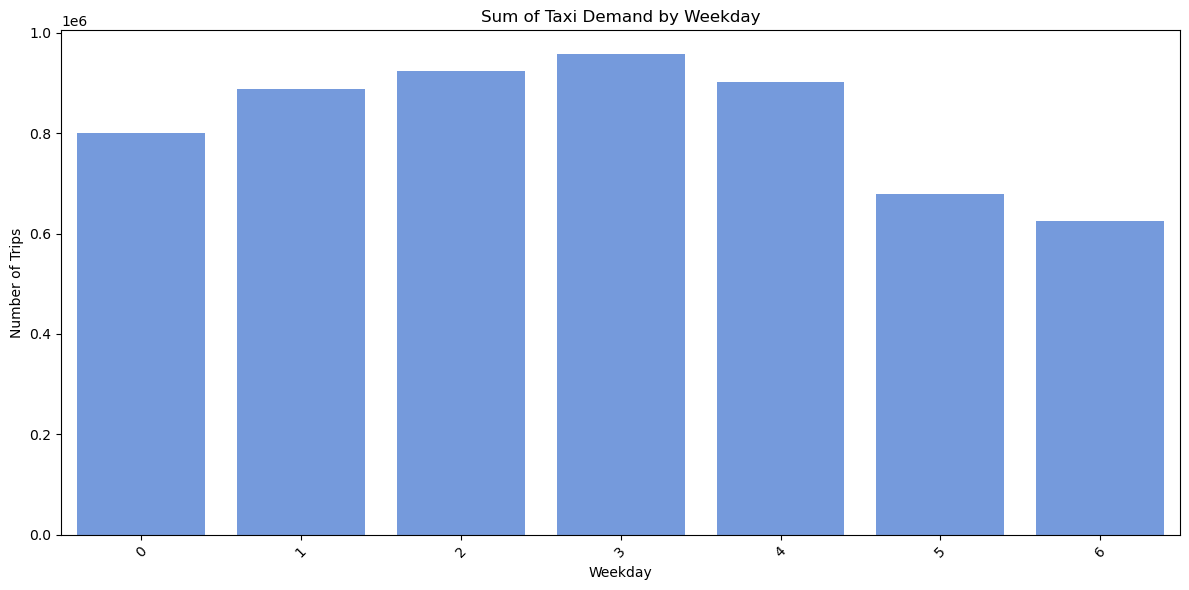

In [43]:
# Group by 'Weekday and sum the 'Number of Trips'
weekday_traffic = census_tract_hourly.groupby('Weekday')['Number of Trips'].sum().reset_index()

# Plot the weekly traffic volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='Number of Trips', data=weekday_traffic, color="cornflowerblue")
plt.title('Sum of Taxi Demand by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('demand by weekday.png', bbox_inches='tight')
plt.show()

## Taxi Demand by Weekday and Hour

In [ ]:
cross_tab = pd.crosstab([census_tract_hourly['Weekday'],census_tract_hourly['Hour'].dt.day_name()], census_tract_hourly['Hour_Of_Day'], values=census_tract_hourly['Number of Trips'], aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap='Blues', annot=False, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Count of Taxi Trips By Hour and Weekday')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()

## Taxi Demand by Month

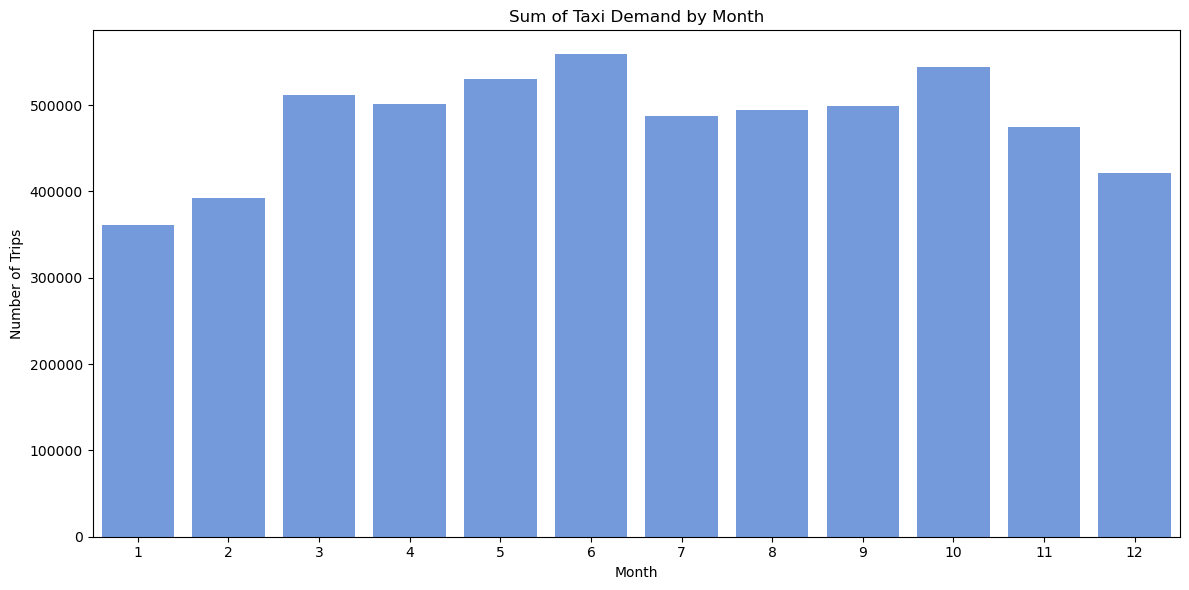

In [44]:
# Group by 'Month' and sum the 'Number of Trips'
monthly_traffic = census_tract_hourly.groupby('Month')['Number of Trips'].sum().reset_index()

# Plot the monthly traffic volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Number of Trips', data=monthly_traffic, color="cornflowerblue")
plt.title('Sum of Taxi Demand by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.savefig('demand by month.png', bbox_inches='tight')
plt.show()

## Taxi Demand by Census Tract

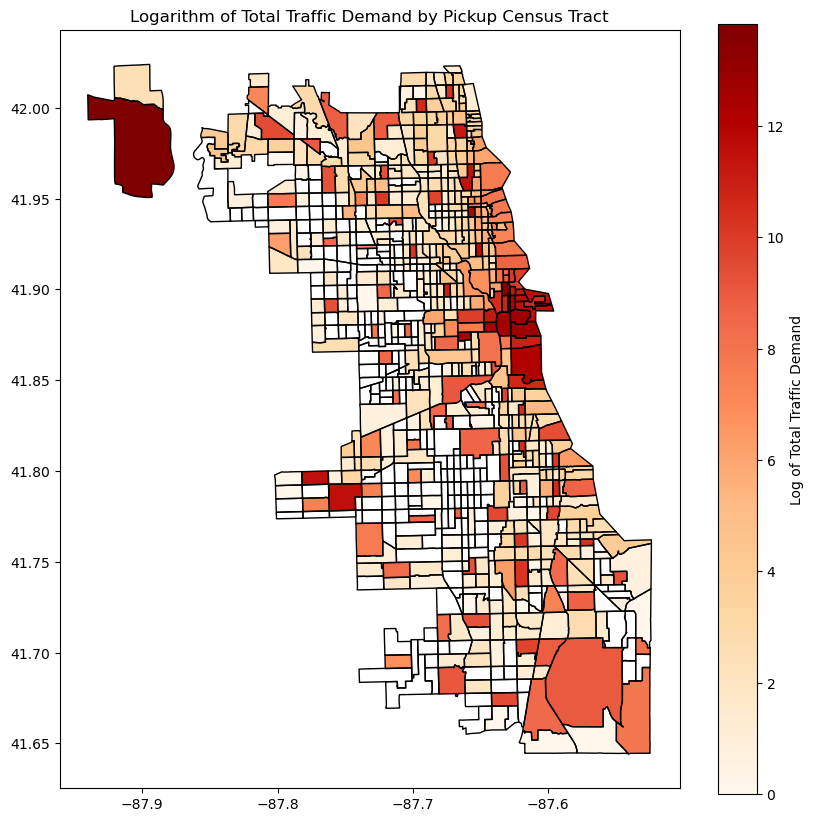

In [45]:
census_tract_shapefile = gpd.read_file('Boundaries - Census Tracts - 2010/geo_export_43205675-be18-433e-beb4-7eb585400a4e.shp')


# Calculate the sum of trips per geometry
census_trips = census_tract_daily.groupby(['geometry'])['Number of Trips'].sum().reset_index()
census_trips['Log Number of Trips'] = np.log(census_trips['Number of Trips'])

# Convert the DataFrame to a GeoDataFrame
census_trips = gpd.GeoDataFrame(census_trips, geometry=gpd.GeoSeries.from_wkt(census_trips['geometry']))

# Plot the data
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
census_trips.plot(ax=ax, column='Log Number of Trips', cmap='OrRd', legend=True,
                  legend_kwds={'label': "Log of Total Traffic Demand",
                               'orientation': "vertical"})
census_tract_shapefile.plot(ax=ax, edgecolor='black', facecolor='none')
plt.title('Logarithm of Total Traffic Demand by Pickup Census Tract')
plt.savefig('log census tract demand.png', bbox_inches='tight')
plt.show()

## Taxi Demand by Hexagon

In [46]:
hexagon7_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39905 entries, 0 to 39904
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             39905 non-null  datetime64[ns]
 1   hex_id_7         39905 non-null  object        
 2   Trip Seconds     39905 non-null  float64       
 3   Trip Miles       39905 non-null  float64       
 4   Fare             39905 non-null  float64       
 5   Tips             39905 non-null  float64       
 6   Tolls            39905 non-null  float64       
 7   Extras           39905 non-null  float64       
 8   Trip Total       39905 non-null  float64       
 9   Number of Trips  39905 non-null  float64       
 10  hex_geometry_7   39905 non-null  object        
 11  bank             39905 non-null  float64       
 12  bar              39905 non-null  float64       
 13  biergarten       39905 non-null  float64       
 14  cafe             39905 non-null  float

/Users/hsienpanghsieh/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


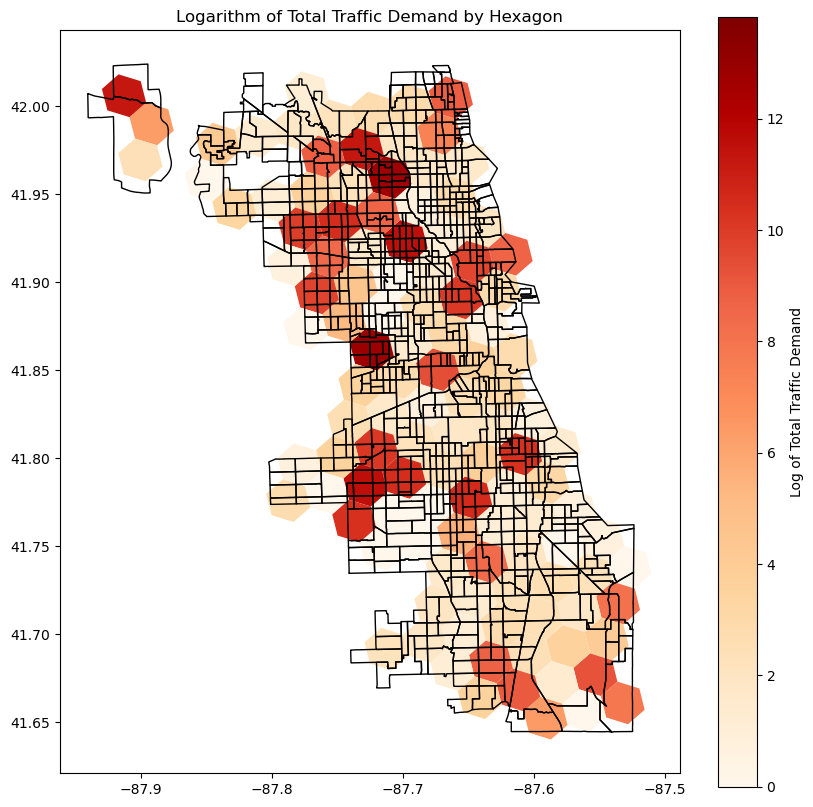

In [47]:
# Calculate the sum of trips per geometry
hexagon_trips = hexagon7_daily.groupby(['hex_geometry_7'])['Number of Trips'].sum().reset_index()
hexagon_trips['Log Number of Trips'] = np.log(hexagon_trips['Number of Trips'])

# Convert the DataFrame to a GeoDataFrame
hexagon_trips = gpd.GeoDataFrame(census_trips, geometry=gpd.GeoSeries.from_wkt(hexagon_trips['hex_geometry_7']))

# Plot the data
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()

hexagon_trips.plot(ax=ax, column='Log Number of Trips', cmap='OrRd', legend=True,
                  legend_kwds={'label': "Log of Total Traffic Demand",
                               'orientation': "vertical"})
census_tract_shapefile.plot(ax=ax, edgecolor='0', facecolor='none')

plt.title('Logarithm of Total Traffic Demand by Hexagon')
plt.savefig('log hexagon demand.png', bbox_inches='tight')
plt.show()

# Weather Data Analysis for a single census tract

In [48]:
# calculate average daily trips
avg_trips_per_tract = census_tract_daily.groupby('Pickup Census Tract')['Number of Trips'].mean()

# Find the census tract with the highest average traffic volume
highest_avg_tract = avg_trips_per_tract.idxmax()
highest_avg_value = avg_trips_per_tract.max()

print(f"Census Tract with highest average number of trips: {highest_avg_tract} (Average: {highest_avg_value})")

Census Tract with highest average number of trips: 17031980000 (Average: 2782.8383561643836)


In [49]:
df_highest_tract = census_tract_daily[census_tract_daily['Pickup Census Tract'] == highest_avg_tract]

In [50]:
df_highest_tract

,Date,Pickup Census Tract,Number of Trips,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,...,taxi,university,tavg,tmin,tmax,prcp,wdir,wspd,pres,Is_Holiday
36,2023-01-01,17031980000,1654,2612645.0,23067.06,64193.97,10231.06,1.80,7603.50,82456.83,...,1.0,0.0,4.3,2.8,7.2,4.1,245.0,6.1,1013.7,1
164,2023-01-02,17031980000,1979,3049730.0,27080.15,77598.75,12489.11,8.00,8900.09,99474.95,...,1.0,0.0,3.4,0.0,6.1,0.0,31.0,10.4,1016.8,1
278,2023-01-03,17031980000,1764,3170541.0,23917.33,68210.46,10494.89,4.50,8139.16,87258.51,...,1.0,0.0,4.8,3.9,8.9,28.4,28.0,12.2,1003.9,0
398,2023-01-04,17031980000,1519,2586529.0,19367.84,56550.05,8699.09,12.81,7067.24,72689.19,...,1.0,0.0,3.9,0.6,6.7,0.0,228.0,13.3,1006.5,0
520,2023-01-05,17031980000,1346,2258206.0,17052.01,49762.82,7842.76,0.01,5934.00,63844.09,...,1.0,0.0,0.6,0.0,1.1,0.5,234.0,13.7,1011.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47351,2023-12-27,17031980000,2276,4591223.0,31327.04,87892.34,14136.79,30.60,10297.79,112981.02,...,1.0,0.0,2.4,-1.0,5.6,0.0,21.0,14.4,1015.5,0
47470,2023-12-28,17031980000,2066,4375373.0,28311.74,79739.91,12357.69,20.42,9400.57,102084.59,...,1.0,0.0,3.1,1.1,5.6,3.3,338.0,18.0,1009.5,0
47599,2023-12-29,17031980000,2058,4156714.0,27772.53,79514.85,12502.49,41.40,9366.94,101978.68,...,1.0,0.0,3.9,-0.5,4.4,3.6,329.0,15.5,1009.7,0
47725,2023-12-30,17031980000,2030,3664085.0,27894.35,78738.93,12810.06,54.50,9312.55,101503.04,...,1.0,0.0,-0.3,-2.7,2.8,0.0,223.0,11.2,1010.9,0


In [51]:
# Summary statistics for the selected census tract
summary_stats = df_highest_tract.describe()
print(summary_stats)

       Pickup Census Tract  Number of Trips  Trip Seconds    Trip Miles  \
count         3.650000e+02       365.000000  3.650000e+02    365.000000   
mean          1.703198e+10      2782.838356  6.144135e+06  38886.671808   
std           0.000000e+00       892.055454  2.384501e+06  13633.640703   
min           1.703198e+10       743.000000  1.095973e+06   9725.740000   
25%           1.703198e+10      2023.000000  4.089764e+06  27225.020000   
50%           1.703198e+10      2826.000000  6.087805e+06  38956.070000   
75%           1.703198e+10      3479.000000  8.024626e+06  49441.060000   
max           1.703198e+10      5152.000000  1.430792e+07  78069.780000   

                Fare          Tips        Tolls        Extras     Trip Total  \
count     365.000000    365.000000   365.000000    365.000000     365.000000   
mean   112816.239479  19413.014192    92.140822  12612.031945  145751.868904   
std     39088.101701   7331.291386   483.964254   4092.270843   50704.008667   
min 

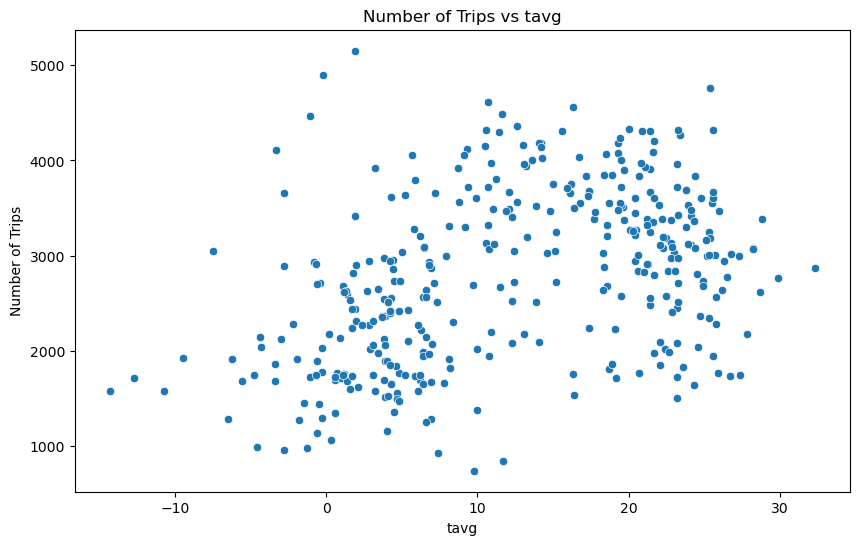

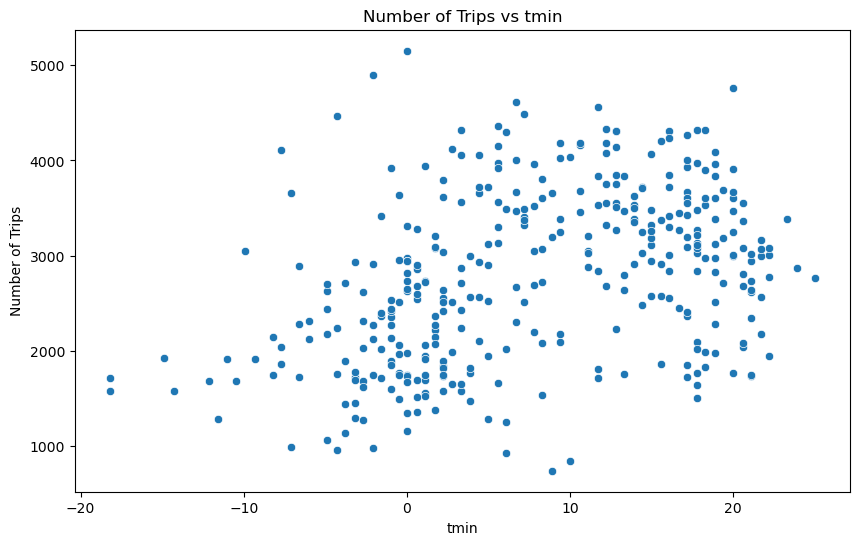

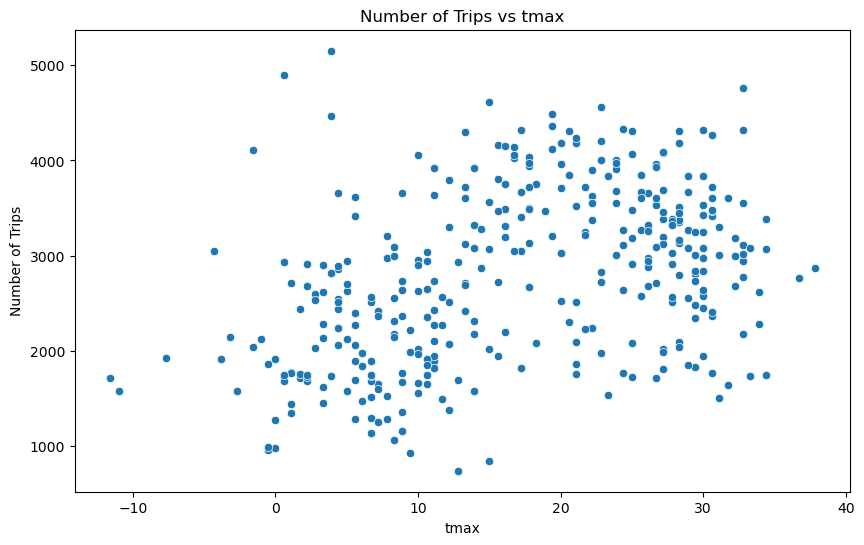

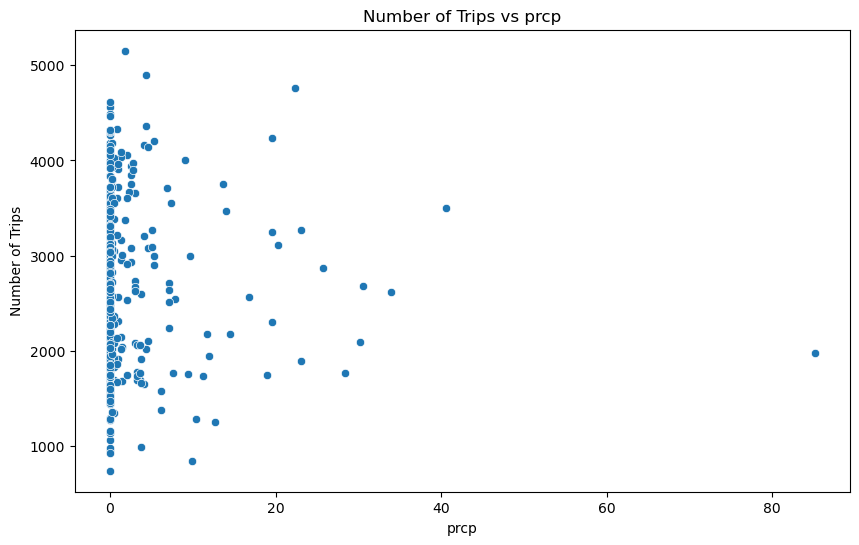

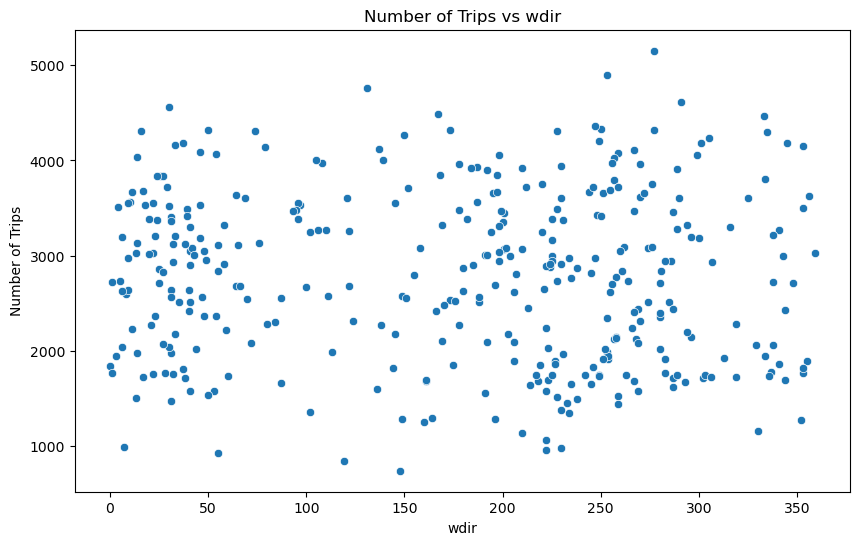

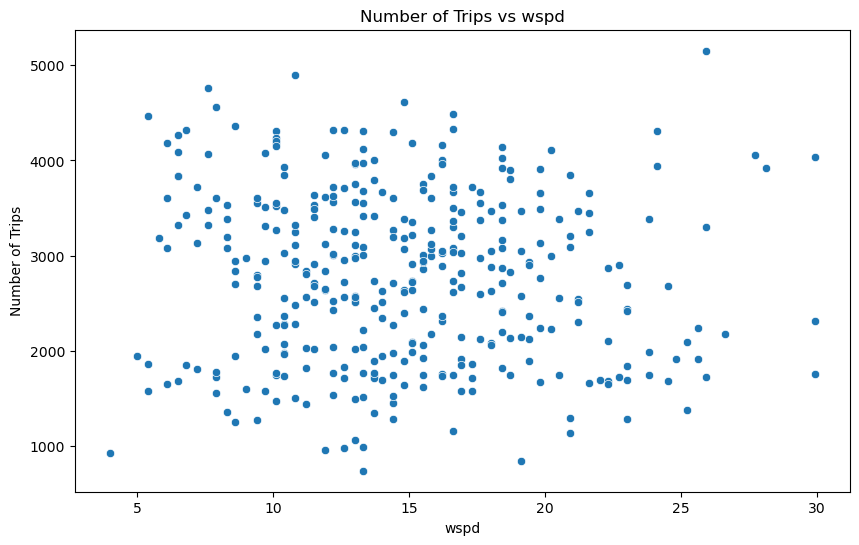

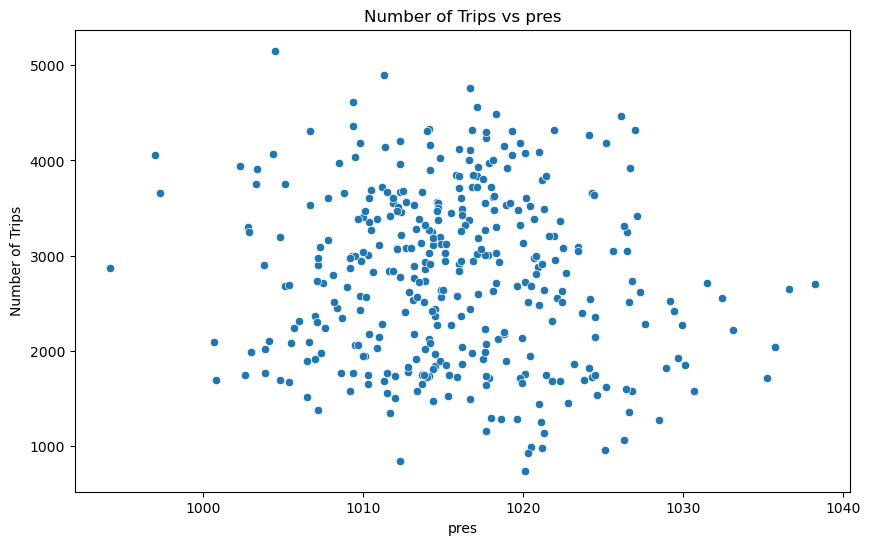

In [52]:
# Scatter plots of Number of Trips vs. Other Features
features = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_highest_tract[feature], y=df_highest_tract['Number of Trips'])
    plt.title(f'Number of Trips vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Trips')
    # Save the plot
    plt.savefig(f'scatter_plot_number_of_trips_vs_{feature}.png')
    plt.show()

# Evaluate Weather Data in higher Time Resolution

In [53]:
# Filter the DataFrame
filtered_df = census_tract_hourly[census_tract_hourly['Pickup Census Tract'] == 17031980000]

# Display the first few rows of the filtered DataFrame to verify
filtered_df.head()

,Hour,Pickup Census Tract,Number of Trips,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,...,prcp,wdir,wspd,pres,coco,Is_Holiday,Date,Hour_Of_Day,Weekday,Month
19,2023-01-01 00:00:00,17031980000,16,21944.0,230.36,588.00,75.79,0.0,151.0,819.29,...,0.0,120.0,7.6,1012.8,4.0,1,2023-01-01,0,6,1
68,2023-01-01 01:00:00,17031980000,6,9420.0,56.40,255.00,33.20,0.0,27.5,315.70,...,0.0,140.0,11.2,1012.4,4.0,1,2023-01-01,1,6,1
126,2023-01-01 02:00:00,17031980000,4,6851.0,30.53,162.00,17.31,0.0,15.0,194.81,...,0.0,140.0,11.2,1012.4,4.0,1,2023-01-01,2,6,1
209,2023-01-01 04:00:00,17031980000,3,46692.0,22.49,146.75,0.00,0.0,4.0,150.75,...,0.0,80.0,5.4,1012.3,4.0,1,2023-01-01,4,6,1
237,2023-01-01 05:00:00,17031980000,6,9098.0,90.53,226.00,32.59,0.0,30.5,291.59,...,0.0,0.0,0.0,1012.3,4.0,1,2023-01-01,5,6,1


In [54]:
# Convert the date column to datetime if it's not already
census_tract_hourly['Hour'] = pd.to_datetime(census_tract_hourly['Hour'])

# Set the date as the index
census_tract_hourly.set_index('Hour', inplace=True)

# Group by day and calculate the range of prcp for each day
daily_fluctuation = census_tract_hourly['prcp'].resample('D').agg(lambda x: x.max() - x.min())

# Find the date with the highest fluctuation
date_highest_fluctuation = daily_fluctuation.idxmax()
highest_fluctuation_value = daily_fluctuation.max()

# Output the result
print(f"The date with the highest fluctuation in precipitation is {date_highest_fluctuation}, with a fluctuation of {highest_fluctuation_value:.2f} mm.")

The date with the highest fluctuation in precipitation is 2023-07-11 00:00:00, with a fluctuation of 21.10 mm.


In [55]:
# Define the date you want to filter by
target_date = pd.Timestamp('2023-07-11')

# Filter the DataFrame
filtered_df_date = filtered_df[filtered_df['Hour'].dt.date == target_date.date()]

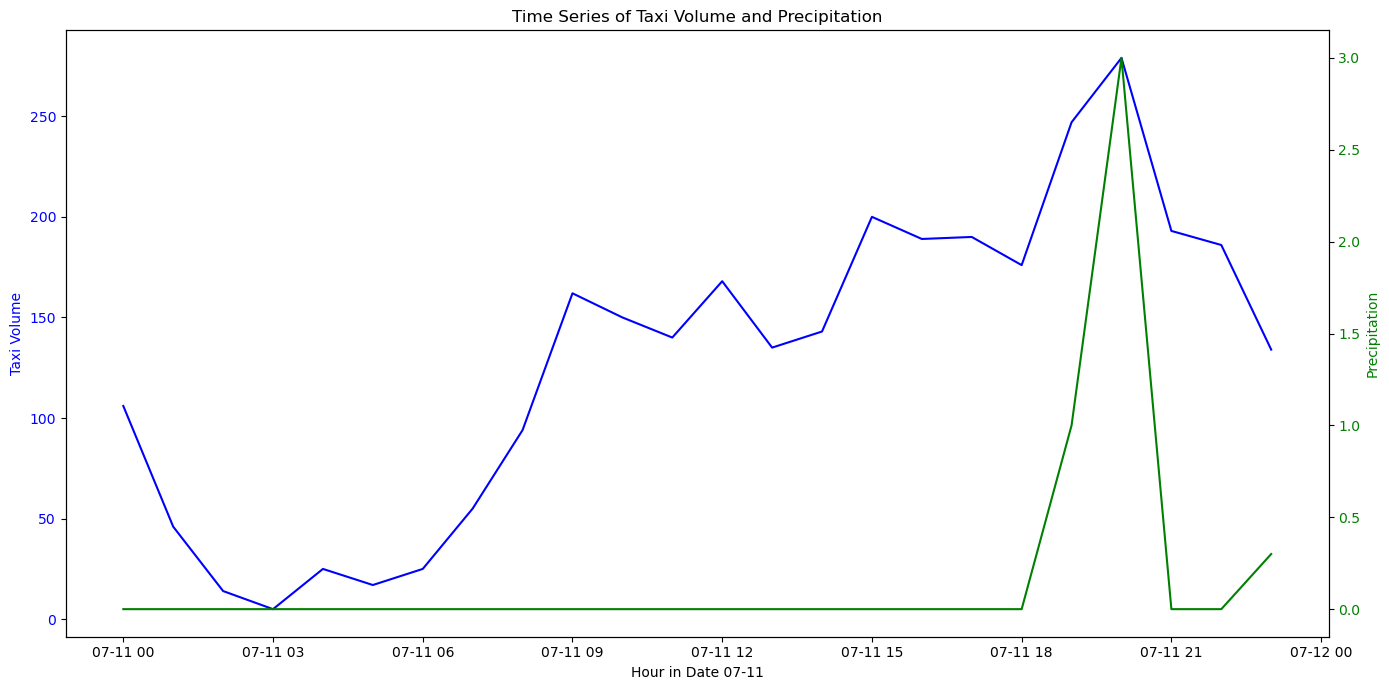

In [56]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot taxi volume
ax1.set_xlabel('Hour in Date 07-11')
ax1.set_ylabel('Taxi Volume', color='blue')
ax1.plot(filtered_df_date['Hour'], filtered_df_date['Number of Trips'], color='blue', label='Taxi Volume')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for precipitation
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation', color='green')
ax2.plot(filtered_df_date['Hour'], filtered_df_date['prcp'], color='green', label='Precipitation')
ax2.tick_params(axis='y', labelcolor='green')

# Add titles and labels
plt.title('Time Series of Taxi Volume and Precipitation')
fig.tight_layout()  # Adjust layout to prevent overlap

# Show plot
plt.savefig('taxi volume vs prep.png', bbox_inches='tight')
plt.show()

# POI Data

In [57]:
census_tract_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47924 entries, 0 to 47923
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 47924 non-null  datetime64[ns]
 1   Pickup Census Tract  47924 non-null  int64         
 2   Number of Trips      47924 non-null  int64         
 3   Trip Seconds         47924 non-null  float64       
 4   Trip Miles           47924 non-null  float64       
 5   Fare                 47924 non-null  float64       
 6   Tips                 47924 non-null  float64       
 7   Tolls                47924 non-null  float64       
 8   Extras               47924 non-null  float64       
 9   Trip Total           47924 non-null  float64       
 10  geometry             47924 non-null  object        
 11  bank                 47924 non-null  float64       
 12  bar                  47924 non-null  float64       
 13  biergarten           47924 non-

In [61]:
import pandas as pd

# Define POI columns
poi_columns = ['bank', 'bar', 'biergarten', 'cafe', 'casino', 'cinema', 
                'college', 'fast_food', 'hospital', 'ice_cream', 
                'kindergarten', 'library', 'nightclub', 'pub', 
                'restaurant', 'school', 'taxi', 'university']

# Group by 'Pickup Census Tract' and calculate average number of trips and extract POI count
result_df = census_tract_daily.groupby('Pickup Census Tract').agg(
    Average_Number_of_Trips=('Number of Trips', 'mean'),
    **{poi: (poi, 'max') for poi in poi_columns} 
).reset_index()

result_df

,Pickup Census Tract,Average_Number_of_Trips,bank,bar,biergarten,cafe,casino,cinema,college,fast_food,hospital,ice_cream,kindergarten,library,nightclub,pub,restaurant,school,taxi,university
0,17031010100,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,17031010201,1.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,17031010202,1.500000,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,17031010300,1.705882,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,17031010400,1.000000,1.0,2.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,17031843600,1.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
538,17031843700,1.666667,1.0,1.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0
539,17031843900,1.440000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
540,17031980000,2782.838356,1.0,15.0,0.0,19.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,2.0,2.0,31.0,0.0,1.0,0.0


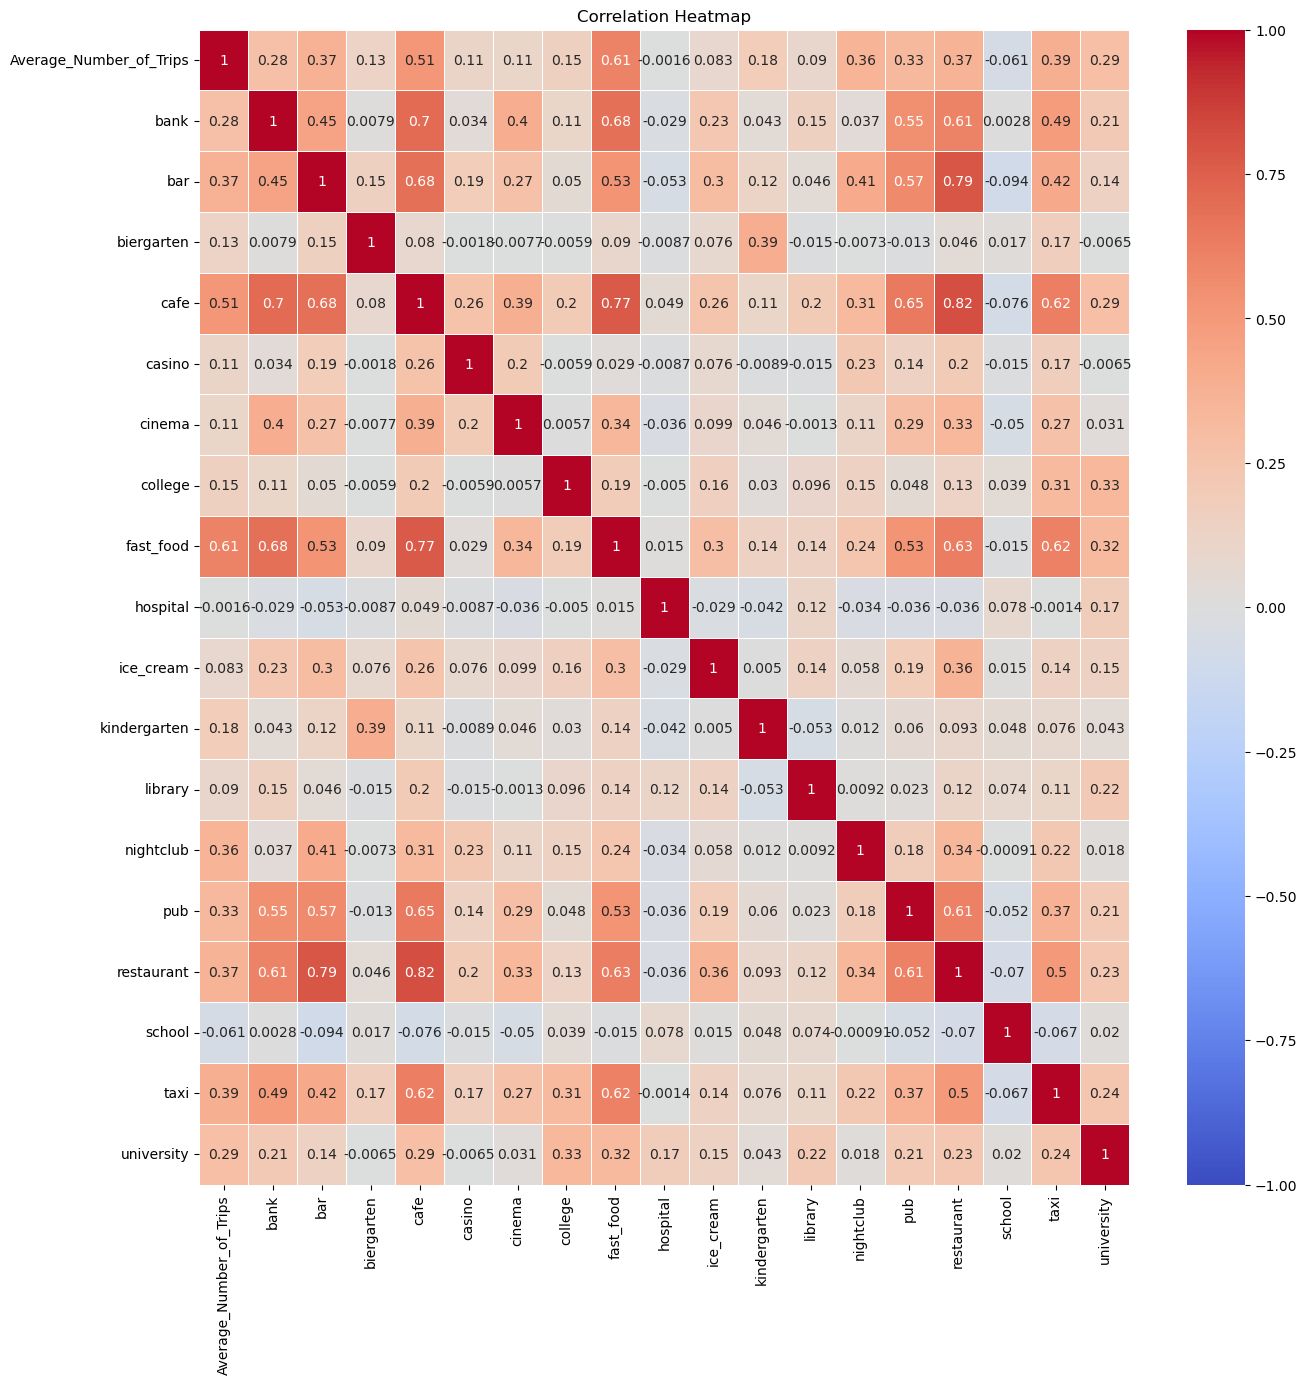

In [62]:
# Calculate the correlation matrix
result_df = result_df.drop("Pickup Census Tract",axis=1)
correlation_matrix = result_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')

#plt.savefig('poi correlation.png', bbox_inches='tight')
plt.show()